In [41]:
import os
import getpass
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors
from reportlab.platypus import *
 


In [24]:
df = pd.read_excel('report.xlsx', header = [0,1])
df

2017-07-01                            \
Loan Age 07.01.17 Cohort 15 Day DQ 07.01.17 Cohort 30 Day DQ   
1                              NaN                       NaN   
2                         0.017542                  0.007817   
3                         0.013282                  0.010125   
4                         0.014881                  0.011561   
5                         0.015986                  0.011588   
6                         0.023188                  0.013593   
7                         0.022975                  0.013567   
8                         0.019354                  0.011152   

                                                               \
Loan Age 07.01.17 Cohort 45 Day DQ 07.01.17 Cohort 60+ Day DQ   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                         0.011293                   0.007293   
4                         0.008368                   0.028513   
5                         0.008231                   0.040024   
6                         0.010198                   0.037024   
7                         0.010807                   0.042764   
8                         0.010957                   0.045801   

                        2017-08-01                            \
Loan Age 08.01.17 Cohort 15 Day DQ 08.01.17 Cohort 30 Day DQ   
1                         0.005127                       NaN   
2                         0.015734                  0.009675   
3                         0.014246                  0.009409   
4                         0.016748                  0.010796   
5                         0.019133                  0.012420   
6                         0.018633                  0.014089   
7                         0.018840                  0.012665   
8                         0.014519                  0.013719   

                                                               \
Loan Age 08.01.17 Cohort 45 Day DQ 08.01.17 Cohort 60+ Day DQ   
1                              NaN                        NaN   
2                         0.003751                        NaN   
3                         0.010626                   0.012631   
4                         0.007830                   0.031641   
5                         0.010297                   0.039298   
6                         0.009707                   0.039705   
7                         0.009665                   0.042925   
8                         0.009999                   0.056233   

                        2017-09-01                            \
Loan Age 09.01.17 Cohort 15 Day DQ 09.01.17 Cohort 30 Day DQ   
1                         0.003321                       NaN   
2                         0.015970                  0.008810   
3                         0.015499                  0.012408   
4                         0.013728                  0.010471   
5                         0.014387                  0.011232   
6                         0.015163                  0.010366   
7                         0.017292                  0.015536   
8                              NaN                       NaN   

                    ...                            2018-02-01  \
Loan Age            ...             02.01.18 Cohort 45 Day DQ   
1                   ...                                   NaN   
2                   ...                                   NaN   
3                   ...                                   NaN   
4                   ...                                   NaN   
5                   ...                                   NaN   
6                   ...                                   NaN   
7                   ...                                   NaN   
8                   ...                                   NaN   

                                                   2018-03-01  \
Loan Age 02.01.18 Cohort 60+ Day DQ 03.01.18 Cohort 15 Day DQ   
1                 

In [57]:
idx = pd.IndexSlice
cohort = [15,30,45,60]
data ={}
for i in range(len(cohort)):
    data[cohort[i]] = df.loc[:,idx[:,[col for col in df.columns.get_level_values(1) if str(cohort[i]) in col]]]
    data[cohort[i]].iloc[0,:].fillna(0, inplace=True)

data[30]

,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01
Loan Age,07.01.17 Cohort 30 Day DQ,08.01.17 Cohort 30 Day DQ,09.01.17 Cohort 30 Day DQ,10.01.17 Cohort 30 Day DQ,11.01.17 Cohort 30 Day DQ,12.01.17 Cohort 30 Day DQ,01.01.18 Cohort 30 Day DQ,02.01.18 Cohort 30 Day DQ,03.01.18 Cohort 30 Day DQ,04.01.18 Cohort 30 Day DQ
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.007817,0.009675,0.008810,0.008076,0.009101,0.007066,0.006667,NaN,NaN,NaN
3,0.010125,0.009409,0.012408,0.010705,0.009174,0.008194,0.010200,NaN,NaN,NaN
4,0.011561,0.010796,0.010471,0.010195,0.007519,0.006480,NaN,NaN,NaN,NaN
5,0.011588,0.012420,0.011232,0.009104,0.009516,NaN,NaN,NaN,NaN,NaN
6,0.013593,0.014089,0.010366,0.011181,NaN,NaN,NaN,NaN,NaN,NaN
7,0.013567,0.012665,0.015536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.011152,0.013719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


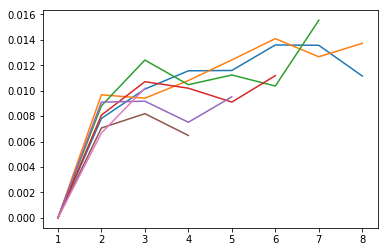

In [65]:
num = data[30].shape[1]
for i in range(num):
    plt.plot(data[30].iloc[:,i])
plt.show()